In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from matplotlib import font_manager, rc, rcParams
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
rcParams['axes.unicode_minus'] = False

In [2]:
np.random.seed(205)

# random my_sample 생성
x1 = np.random.rand(300)*5
x2 = np.random.rand(300)*10
my_sample = pd.DataFrame(np.array([x1,x2]).T, columns=['x1', 'x2'])
n = len(my_sample) # 샘플의 수

# 선형 분류를 위한 임의의 기준(criteria)
criteria = my_sample['x1']*14.4+my_sample['x2']*7.3
c0 = my_sample[criteria < 60].index
c1 = my_sample[(criteria < 80) & (criteria >= 60)].index
c2 = my_sample[criteria >= 80].index

# 임의 기준을 근거로 0, 1, 2로 분류
my_sample.loc[c0, 'y'] = 0
my_sample.loc[c1, 'y'] = 1
my_sample.loc[c2, 'y'] = 2

# outlier 20개 수동으로 추가
my_sample.loc[n] = [1.4, 3.2, 1]
my_sample.loc[n+1] = [2.5, 7.2, 1]
my_sample.loc[n+2] = [4.28, 2.26, 0]
my_sample.loc[n+3] = [4.78, 2.55, 0]
my_sample.loc[n+4] = [1.72, 6.11, 2]
my_sample.loc[n+5] = [2.24, 5.21, 2]
my_sample.loc[n+6] = [2.88, 3.94, 2]
my_sample.loc[n+7] = [1.44, 6.32, 0]
my_sample.loc[n+8] = [2.61, 4.18, 2]
my_sample.loc[n+9] = [3.32, 2.13, 0]
my_sample.loc[n+10] = [2.97, 7.88, 1]
my_sample.loc[n+11] = [1.11, 4.44, 1]
my_sample.loc[n+12] = [1.88, 3.68, 2]
my_sample.loc[n+13] = [3.54, 3.91, 0]
my_sample.loc[n+14] = [3.41, 2.22, 2]
my_sample.loc[n+15] = [2.51, 2.33, 1]
my_sample.loc[n+16] = [0.71, 6.29, 1]
my_sample.loc[n+17] = [0.65, 8.19, 0]
my_sample.loc[n+18] = [2.63, 3.72, 1]
my_sample.loc[n+19] = [0.55, 9.09, 0]

# 종속변수 int형으로 변환 후 저장
my_sample.y = my_sample.y.astype(int)
my_sample.to_csv('sample1.csv', index=False)

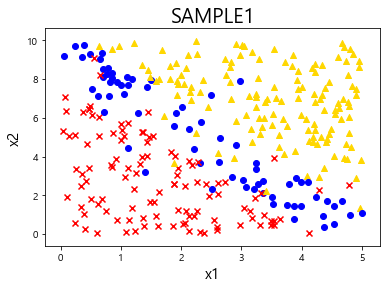

In [3]:
# 저장된 파일 불러오기
sample = pd.read_csv('sample1.csv')

# 독립변수, 종속변수 설정
X = sample.iloc[:, [0,1]]
y = sample.iloc[:, 2].astype(int)

# x축: x1 y축: x2 색/마커: category
colors=('red', 'blue', 'gold')
markers = ('x', 'o', '^')
for i in np.arange(len(X)):
    plt.scatter(X.iloc[i,0], X.iloc[i,1],
                color=colors[np.array(y)[i]], marker=markers[np.array(y)[i]])
plt.title('SAMPLE1', fontsize=20)
plt.xlabel(X.columns[0], fontsize=15)
plt.ylabel(X.columns[1], fontsize=15)
plt.show()

### 선형 SVM 분류 (C값 변화에 따른 양상)

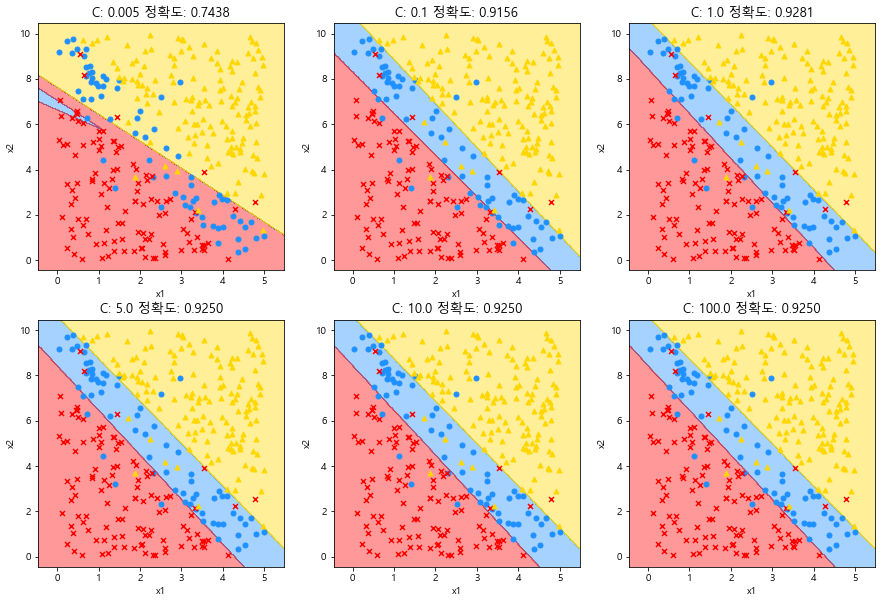

In [4]:
fig = plt.figure(figsize=(15, 10))
k = 1

for C in [0.005, 0.1, 1.0, 5.0, 10.0, 100.0]:
    svm = SVC(kernel='linear', C=C, random_state=1)
    svm.fit(X, y)

    pred = svm.predict(X)

    colors = ('red', 'dodgerblue', 'gold')
    markers = ('x', 'o', '^')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1 = (X.iloc[:, 0].min()-0.5, X.iloc[:, 0].max()+0.5)
    x2 = (X.iloc[:, 1].min()-0.5, X.iloc[:, 1].max()+0.5)
    xx1, xx2 = np.meshgrid(np.arange(x1[0], x1[1], 0.02), 
                np.arange(x2[0], x2[1], 0.02))
    z = svm.predict(np.array([xx1.reshape(-1,), xx2.reshape(-1,)]).T)
    z = z.reshape(xx1.shape)
    
    fig.add_subplot(2,3,k)
    k+=1
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.title(f'C: {C} 정확도: {accuracy_score(y, pred):.4f}', fontsize=13)
    plt.xlabel(f'{X.columns[0]}', fontsize=10)
    plt.ylabel(f'{X.columns[1]}', fontsize=10)

    for i in range(len(X)):
        plt.scatter(X.iloc[i, 0], X.iloc[i, 1], 
                    c=colors[y.iloc[i]], marker=markers[y.iloc[i]], s=25)

###### 애초에 선형적인 기준으로 300개의 랜덤샘플을 생성했기 때문에 선형SVM으로 충분히 우수한 성능을 보인다.
###### 단 선형모델로 완벽히 분류하는 것을 피하기 위해 outlier 20개를 수동으로 샘플에 추가하였다.
###### 그 결과 C값의 변화에 따라 분류 정확도가 점점 높아지는 양상을 보이다가 1정도 수준에서 가장 높은 정확도를 보인다.
###### 그 이상에서는 분류 방법에 별다른 변화가 없었고 정확도 또한 일정하게 유지되는 모습이다.

### 비선형 SVM 분류 (C, gamma 값 변화에 따른 양상)

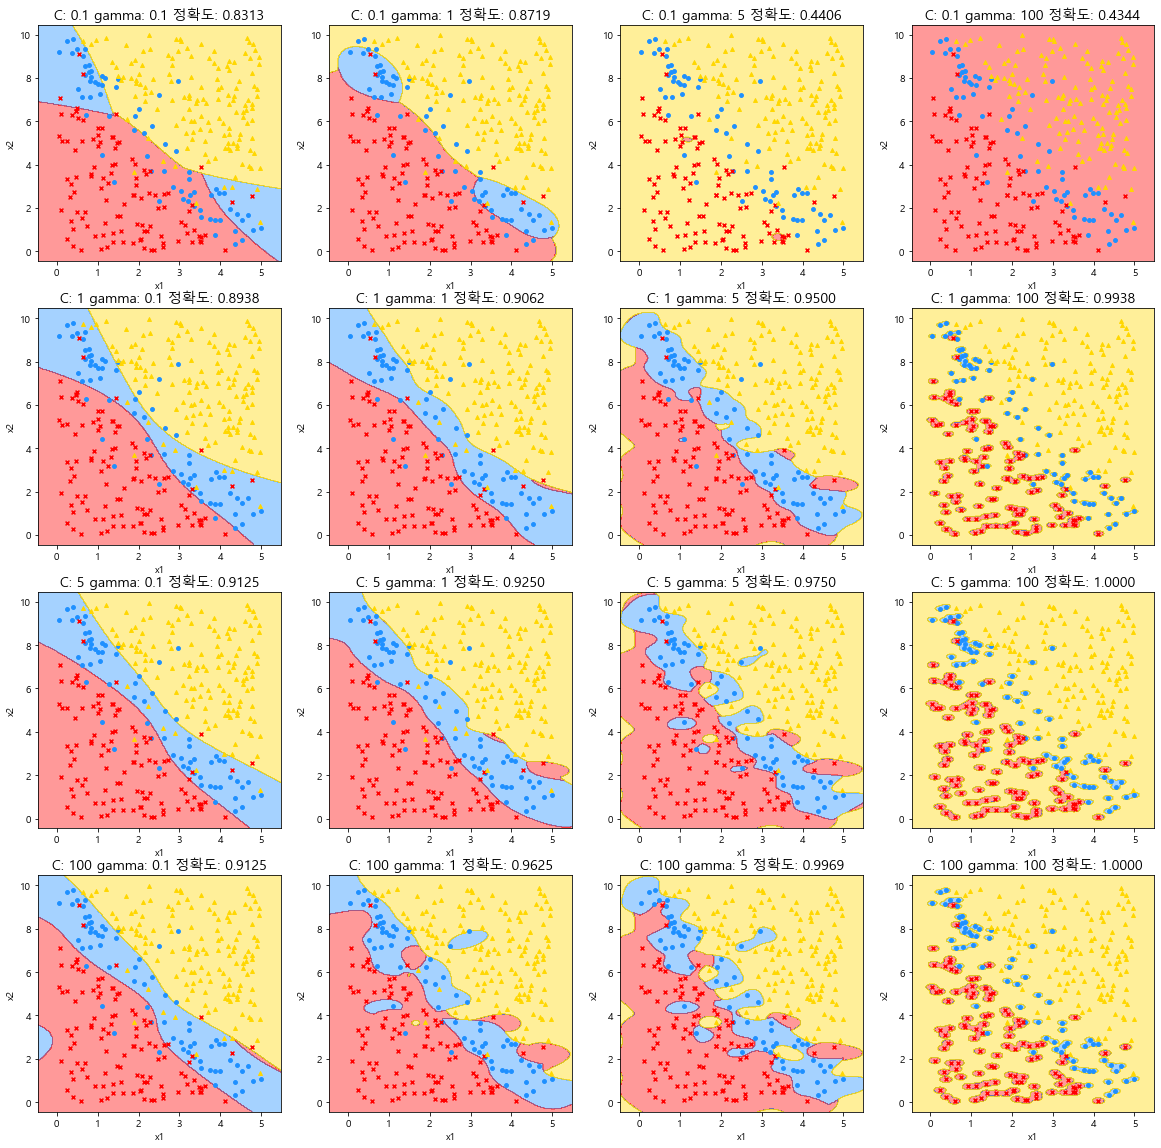

In [5]:
k = 1 # subplot 순서를 위한 변수
fig = plt.figure(figsize=(20,20))

for C in [0.1, 1, 5, 100]: # C값 변화
    for ramma in [0.1, 1, 5, 100]: # gamma값 변화
        # kernel함수로 가우시안 RBF 이용
        svm = SVC(kernel='rbf', C=C, gamma=ramma, random_state=1)
        svm.fit(X, y)

        pred = svm.predict(X)
        
        # 분류 성능 시각화
        colors = ('red', 'dodgerblue', 'gold')
        markers = ('x', 'o', '^')
        cmap = ListedColormap(colors[:len(np.unique(y))])
        
        # plot 생성 범위 설정 (x1: x축, x2: y축)
        x1 = X.iloc[:,0].min()-0.5, X.iloc[:,0].max()+0.5
        x2 = X.iloc[:,1].min()-0.5, X.iloc[:,1].max()+0.5

        xx1, xx2 = np.meshgrid(np.arange(x1[0], x1[1], 0.02),
                    np.arange(x2[0], x2[1], 0.02))
        z = svm.predict(np.array([xx1.reshape(-1,), xx2.reshape(-1,)]).T)
        z = z.reshape(xx1.shape)
        
        # 가로줄 gamma값 변화에 따른 결정경계와 영역 / 세로줄 C값 변화에 따른 결정경계와  영역
        fig.add_subplot(4, 4, k)
        k+=1
        # 영역을 나누고 색을 채우는 함수 cf)contour는 영역 나누기만 함
        plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap) 
        plt.title(f'C: {C} gamma: {ramma} 정확도: {accuracy_score(y, pred):.4f}',
                  fontsize=14)
        plt.xlabel(f'{X.columns[0]}', fontsize=10)
        plt.ylabel(f'{X.columns[1]}', fontsize=10)
        
        # 실제 자료 scatter plot 생성
        for i in range(len(X)):
            plt.scatter(X.iloc[i,0], X.iloc[i,1], 
                        c=colors[y.iloc[i]], marker=markers[y.iloc[i]], s=15)

###### 위에서 도출한 비선형 SVM 분류모형 중에서 최선 결정경계는 C=5 gamma=0.1 정도일 때로 판단된다.
###### gamma 값이 1 이상인 모델에서는 정확도가 대체적으로 높은편이긴 하지만 overfitting 가능성이 높아 보인다.
###### 특히 gamma가 100일 때 분류 모형을 보면 결정경계가 매우 지역적인 점을 보면 더욱 그렇다.
###### 더 최적화된 모형에 대한 탐색도 필요할 것으로 보인다. C는 5 근방, gamma는 0.1 근방에서..